In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 5.1MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=df216eb78045298eb778e265f158ef7b78b088a397a3645285be6e2bf51f9c3c
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 9.4MB/s 
     |████████████████████████████████| 983kB 4.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=21c3a8a2a6d3157f528f4c7420f0b3171b98df6877cb7b4f1f960ab1c3b5d414
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [9]:
df_jp_wm = pd.read_json('pretty_jp_tweets_feedback.json')

df_gs_wm = pd.read_json('pretty_gs_tweets_feedback.json')

df_ms_wm = pd.read_json('pretty_ms_tweets_feedback.json')

df_ml_wm = pd.read_json('pretty_ml_tweets_feedback.json')



#sample = pd.read_csv('TwitterData.csv')



In [10]:
df_jp_wm = df_jp_wm.assign(company = "JPM")

In [11]:
df_gs_wm = df_gs_wm.assign(company = "GS")

In [12]:
df_ml_wm = df_ml_wm.assign(company = "ML")

In [13]:
df_ms_wm = df_gs_wm.assign(company = "MS")

In [14]:
df_all_wm = pd.concat([df_jp_wm,df_gs_wm,df_ml_wm,df_ms_wm])

In [15]:
#Sentiment Analysis
#Vader Sentiment

In [16]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
sentiment = df_all_wm['text'].apply(lambda x: analyzer.polarity_scores(x))

In [18]:
#Inserting the sentiment into the dataframe
df_all_wm = pd.concat([df_all_wm, sentiment.apply(pd.Series)],1)

In [19]:
df_all_wm.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound
0,False,[],[],False,False,0,[http://CUToday.info],,0,[],0,FrankCUToday,More headlines on http://CUToday.info : That g...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-27 13:47:06,2018-08-27 13:47:06,1034074832617398272,/FrankCUToday/status/1034074832617398272,154156819,Frank J. Diekmann,,JPM,0.0,0.950,0.050,0.2732
1,False,[],[],False,False,1,[],,0,[],0,simple_malibog,Anyone whose currently employed with American ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-21 22:41:11,2018-08-21 22:41:11,1032034911924846592,/simple_malibog/status/1032034911924846592,778005293863055360,OliverPaz,,JPM,0.0,0.690,0.310,0.6590
2,False,[],[],False,False,0,[http://CUToday.info],,0,[],0,FrankCUToday,More headlines on http://CUToday.info : That g...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-27 13:47:06,2018-08-27 13:47:06,1034074832617398272,/FrankCUToday/status/1034074832617398272,154156819,Frank J. Diekmann,,JPM,0.0,0.950,0.050,0.2732
3,False,[],[],False,False,1,[],,0,[],0,simple_malibog,Anyone whose currently employed with American ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-21 22:41:11,2018-08-21 22:41:11,1032034911924846592,/simple_malibog/status/1032034911924846592,778005293863055360,OliverPaz,,JPM,0.0,0.690,0.310,0.6590
4,False,[],[],False,True,0,[],1235865853398093825,0,"[{'screen_name': 'THSch_Careers', 'user_id': '...",0,TalbotHeathSch,"Feedback from pupils has been great, very insp...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-07 08:47:42,2020-03-07 08:47:42,1236211914071515136,/TalbotHeathSch/status/1236211914071515137,228340840,Talbot Heath School,,JPM,0.0,0.445,0.555,0.9099
5,False,[],[],False,True,0,[],1235865853398093825,0,"[{'screen_name': 'THSch_Careers', 'user_id': '...",0,TalbotHeathSch,"Feedback from pupils has been great, very insp...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-07 08:47:42,2020-03-07 08:47:42,1236211914071515136,/TalbotHeathSch/status/1236211914071515137,228340840,Talbot Heath School,,JPM,0.0,0.445,0.555,0.9099
6,False,[],[],False,False,0,[https://websfavourites.com/world-news-update/...,,0,[],0,websfavourites,"Good morning. It’s Friday, so time for some fe...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-04 09:22:56,2019-10-04 09:22:56,1180050662698168320,/websfavourites/status/1180050662698168320,984607301624582144,WebsFavorites.Com - All your Favorite News Here!,,JPM,0.0,0.872,0.128,0.6124
7,True,[],[https://pbs.twimg.com/media/EE9PbF_XsAA94pk.jpg],True,False,13,[https://www.bullionstar.com/blogs/ronan-manly...,,4,[],3,ronanmanly,Does anyone think these articles are any good?...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-21 03:08:24,2019-09-21 03:08:24,1175245362745008128,/ronanmanly/status/1175245362745008129,139134500,Ronan Manly,,JPM,0.0,0.723,0.277,0.8143
8,False,[],[],False,False,0,[https://www.instagram.com/p/B2BzVqAjnRA/?igsh...,,0,[],0,CsGrand1,Thank you for choosing to stay with CS GRAND. ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-05 11:41:17,2019-09-05 11:41:17,1169576227885191168,/CsGrand1/status/1169576227885191173,976015820215037952,Cs Grand,,JPM,0.0,0.647,0.353,0.9648
9,False,[],[],False,False,0,[https://websfavourites.com/world-news-update/...,,0,[],0,websfavourites,"Good morning. It’s Friday, so time for some fe...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-04 09:22:56,2019-10-04 09:22:56,1180050662698168320,/websfavourites/status/1180050662698168320,984607301624582144,WebsFavorites.Com - All your Favorite News Here!,,JPM,0.0,0.872,0.128,0.6124


In [20]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [21]:
df_all_wm['date'] = df_all_wm['timestamp'].apply(lambda x: x.date())

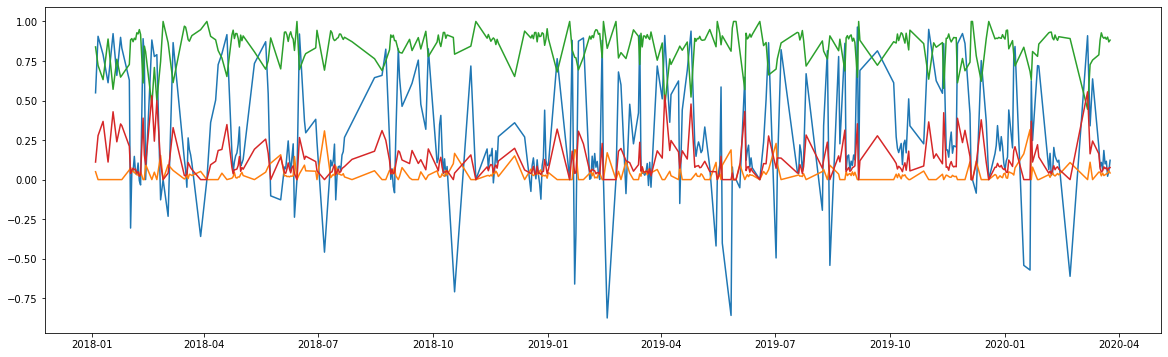

In [22]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df_all_wm.groupby('date').mean()['compound'].index, df_all_wm.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df_all_wm.groupby('date').mean()['neg'].index, df_all_wm.groupby('date').mean()['neg'].values)
plt.plot(df_all_wm.groupby('date').mean()['neu'].index, df_all_wm.groupby('date').mean()['neu'].values)
plt.plot(df_all_wm.groupby('date').mean()['pos'].index, df_all_wm.groupby('date').mean()['pos'].values)

In [23]:
df_wm_sent_jp = df_all_wm[df_all_wm['company'] == 'JPM']
df_wm_sent_jp.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[http://CUToday.info],,0,[],0,FrankCUToday,More headlines on http://CUToday.info : That g...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-27 13:47:06,2018-08-27 13:47:06,1034074832617398272,/FrankCUToday/status/1034074832617398272,154156819,Frank J. Diekmann,,JPM,0.0,0.950,0.050,0.2732,2018-08-27
1,False,[],[],False,False,1,[],,0,[],0,simple_malibog,Anyone whose currently employed with American ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-21 22:41:11,2018-08-21 22:41:11,1032034911924846592,/simple_malibog/status/1032034911924846592,778005293863055360,OliverPaz,,JPM,0.0,0.690,0.310,0.6590,2018-08-21
2,False,[],[],False,False,0,[http://CUToday.info],,0,[],0,FrankCUToday,More headlines on http://CUToday.info : That g...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-27 13:47:06,2018-08-27 13:47:06,1034074832617398272,/FrankCUToday/status/1034074832617398272,154156819,Frank J. Diekmann,,JPM,0.0,0.950,0.050,0.2732,2018-08-27
3,False,[],[],False,False,1,[],,0,[],0,simple_malibog,Anyone whose currently employed with American ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-21 22:41:11,2018-08-21 22:41:11,1032034911924846592,/simple_malibog/status/1032034911924846592,778005293863055360,OliverPaz,,JPM,0.0,0.690,0.310,0.6590,2018-08-21
4,False,[],[],False,True,0,[],1235865853398093825,0,"[{'screen_name': 'THSch_Careers', 'user_id': '...",0,TalbotHeathSch,"Feedback from pupils has been great, very insp...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-07 08:47:42,2020-03-07 08:47:42,1236211914071515136,/TalbotHeathSch/status/1236211914071515137,228340840,Talbot Heath School,,JPM,0.0,0.445,0.555,0.9099,2020-03-07
5,False,[],[],False,True,0,[],1235865853398093825,0,"[{'screen_name': 'THSch_Careers', 'user_id': '...",0,TalbotHeathSch,"Feedback from pupils has been great, very insp...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-07 08:47:42,2020-03-07 08:47:42,1236211914071515136,/TalbotHeathSch/status/1236211914071515137,228340840,Talbot Heath School,,JPM,0.0,0.445,0.555,0.9099,2020-03-07
6,False,[],[],False,False,0,[https://websfavourites.com/world-news-update/...,,0,[],0,websfavourites,"Good morning. It’s Friday, so time for some fe...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-04 09:22:56,2019-10-04 09:22:56,1180050662698168320,/websfavourites/status/1180050662698168320,984607301624582144,WebsFavorites.Com - All your Favorite News Here!,,JPM,0.0,0.872,0.128,0.6124,2019-10-04
7,True,[],[https://pbs.twimg.com/media/EE9PbF_XsAA94pk.jpg],True,False,13,[https://www.bullionstar.com/blogs/ronan-manly...,,4,[],3,ronanmanly,Does anyone think these articles are any good?...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-21 03:08:24,2019-09-21 03:08:24,1175245362745008128,/ronanmanly/status/1175245362745008129,139134500,Ronan Manly,,JPM,0.0,0.723,0.277,0.8143,2019-09-21
8,False,[],[],False,False,0,[https://www.instagram.com/p/B2BzVqAjnRA/?igsh...,,0,[],0,CsGrand1,Thank you for choosing to stay with CS GRAND. ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-05 11:41:17,2019-09-05 11:41:17,1169576227885191168,/CsGrand1/status/1169576227885191173,976015820215037952,Cs Grand,,JPM,0.0,0.647,0.353,0.9648,2019-09-05
9,False,[],[],False,False,0,[https://websfavourites.com/world-news-update/...,,0,[],0,websfavourites,"Good morning. It’s Friday, so time for some fe...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-04 09:22:56,2019-10-04 09:22:56,1180050662698168320,/websfavourites/status/1180050662698168320,984607301624582144,WebsFavorites.Com - All your Favorite News Here!,,JPM,0.0,0.872,0.128,0.6124,2019-10-04


In [24]:
df_wm_sent_ms = df_all_wm[df_all_wm['company'] == 'MS']
df_wm_sent_ms.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,0,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:48:44,2018-08-24 20:48:44,1033093772958216192,/Jacob_D_Goldman/status/1033093772958216193,222580216,Jacob D. Goldman,,MS,0.000,0.757,0.243,0.8248,2018-08-24
1,False,[],[],True,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,1,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:47:32,2018-08-24 20:47:32,1033093472369033216,/Jacob_D_Goldman/status/1033093472369033216,222580216,Jacob D. Goldman,,MS,0.000,0.744,0.256,0.8248,2018-08-24
2,True,[],[https://pbs.twimg.com/media/DkrQdAIUUAEnhoc.j...,True,True,10,[],1029856578592235522,3,"[{'screen_name': 'HARD_HODL', 'user_id': '1010...",2,haydentiff,A Twitter survey suddenly appeared before my e...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 22:57:25,2018-08-15 22:57:25,1029864667160760320,/haydentiff/status/1029864667160760320,2680350607,Tiffany Hayden🧢,,MS,0.000,0.822,0.178,0.7430,2018-08-15
3,False,[],[],True,True,2,[],1029272758214057984,1,"[{'screen_name': 'AkamatsuJjh', 'user_id': '46...",0,DannyManus,But people DO know things! That Goldman quote ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 00:59:05,2018-08-15 00:59:05,1029532900666953728,/DannyManus/status/1029532900666953728,48051407,Danny Manus,,MS,0.112,0.707,0.181,0.5464,2018-08-15
4,False,[],[],False,False,1,[],,0,[],0,simonsmithy,Feedback from recruiter... Candidate said my i...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-28 08:23:16,2018-07-28 08:23:16,1023121700236537856,/simonsmithy/status/1023121700236537856,66178610,Simon Smith,,MS,0.000,0.872,0.128,0.3612,2018-07-28
5,False,[],[],False,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,0,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:48:44,2018-08-24 20:48:44,1033093772958216192,/Jacob_D_Goldman/status/1033093772958216193,222580216,Jacob D. Goldman,,MS,0.000,0.757,0.243,0.8248,2018-08-24
6,False,[],[],True,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,1,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:47:32,2018-08-24 20:47:32,1033093472369033216,/Jacob_D_Goldman/status/1033093472369033216,222580216,Jacob D. Goldman,,MS,0.000,0.744,0.256,0.8248,2018-08-24
7,True,[],[https://pbs.twimg.com/media/DkrQdAIUUAEnhoc.j...,True,True,10,[],1029856578592235522,3,"[{'screen_name': 'HARD_HODL', 'user_id': '1010...",2,haydentiff,A Twitter survey suddenly appeared before my e...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 22:57:25,2018-08-15 22:57:25,1029864667160760320,/haydentiff/status/1029864667160760320,2680350607,Tiffany Hayden🧢,,MS,0.000,0.822,0.178,0.7430,2018-08-15
8,False,[],[],True,True,2,[],1029272758214057984,1,"[{'screen_name': 'AkamatsuJjh', 'user_id': '46...",0,DannyManus,But people DO know things! That Goldman quote ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 00:59:05,2018-08-15 00:59:05,1029532900666953728,/DannyManus/status/1029532900666953728,48051407,Danny Manus,,MS,0.112,0.707,0.181,0.5464,2018-08-15
9,False,[],[],False,False,1,[],,0,[],0,simonsmithy,Feedback from recruiter... Candidate said my i...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-28 08:23:16,2018-07-28 08:23:16,1023121700236537856,/simonsmithy/status/1023121700236537856,66178610,Simon Smith,,MS,0.000,0.872,0.128,0.3612,2018-07-28


In [25]:
df_wm_sent_ml = df_all_wm[df_all_wm['company'] == 'ML']
df_wm_sent_ml.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,True,2,[],1183880663566389248,0,"[{'screen_name': 'AjaSF', 'user_id': '46658899...",0,AjaSF,Taxpayer money was used to subsidize a string ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 23:48:48,2019-10-14 23:48:48,1183892442258558976,/AjaSF/status/1183892442258558977,46658899,Eincasso Picasstein 🇨🇱 🇺🇸 🏴,,ML,0.000,0.935,0.065,0.2500,2019-10-14
1,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,General Motors Co. (GM) surprised the market w...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 23:23:46,2019-10-14 23:23:46,1183886143433203712,/GoldmanSachBOT/status/1183886143433203719,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.866,0.134,0.5423,2019-10-14
2,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Public Service Enterprise Group (PEG) surprise...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:53:28,2019-10-14 22:53:28,1183878518054240256,/GoldmanSachBOT/status/1183878518054240257,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.871,0.129,0.5106,2019-10-14
3,True,[],[https://pbs.twimg.com/media/EG32WiPWwAA8Fos.png],False,False,0,[],,0,[],1,ezints,Selon le modèle de Bank of America Merrill Lyn...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:32:08,2019-10-14 22:32:08,1183873147826790400,/ezints/status/1183873147826790400,319264607,Ezints,,ML,0.000,1.000,0.000,0.0000,2019-10-14
4,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,"Axon Enterprise, Inc. (AAXN) surprised the mar...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:12:32,2019-10-14 22:12:32,1183868214150909952,/GoldmanSachBOT/status/1183868214150909952,1119063948689596416,EquityMarketPredictor,,ML,0.064,0.872,0.064,0.0000,2019-10-14
5,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Microsoft Corp. (MSFT) surprised the market wi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 21:42:35,2019-10-14 21:42:35,1183860677271797760,/GoldmanSachBOT/status/1183860677271797760,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.857,0.143,0.5423,2019-10-14
6,True,[],[https://pbs.twimg.com/media/EG3d2nwXYAAgLyb.png],True,False,29,[],,1,[],2,DanKawa2,"Segundo a Merrill Lynch, o percentual de IPOs ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 20:45:19,2019-10-14 20:45:19,1183846268336033792,/DanKawa2/status/1183846268336033792,2352090564,Dan Kawa,,ML,0.000,1.000,0.000,0.0000,2019-10-14
7,False,[],[],False,False,3,[https://www.bolsamania.com/noticias/mercados/...,,0,[],1,bolsamania,Merrill Lynch pone techo a Wall Street: 3.333 ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 20:40:00,2019-10-14 20:40:00,1183844928037834752,/bolsamania/status/1183844928037834752,61307129,Bolsamanía,,ML,0.000,1.000,0.000,0.0000,2019-10-14
8,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,"Axon Enterprise, Inc. (AAXN) surprised the mar...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 19:12:34,2019-10-14 19:12:34,1183822923703947264,/GoldmanSachBOT/status/1183822923703947271,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.860,0.140,0.7184,2019-10-14
9,False,[],[],False,False,0,[],,0,[],0,fatchett_james,USA funds will be split between BOA/Merrill-Ly...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 19:02:52,2019-10-14 19:02:52,1183820483969466368,/fatchett_james/status/1183820483969466368,1104508481564889088,James Bradley Fatchett,,ML,0.000,1.000,0.000,0.0000,2019-10-14


In [26]:
df_wm_sent_gs = df_all_wm[df_all_wm['company'] == 'GS']
df_wm_sent_gs.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,0,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:48:44,2018-08-24 20:48:44,1033093772958216192,/Jacob_D_Goldman/status/1033093772958216193,222580216,Jacob D. Goldman,,GS,0.000,0.757,0.243,0.8248,2018-08-24
1,False,[],[],True,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,1,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:47:32,2018-08-24 20:47:32,1033093472369033216,/Jacob_D_Goldman/status/1033093472369033216,222580216,Jacob D. Goldman,,GS,0.000,0.744,0.256,0.8248,2018-08-24
2,True,[],[https://pbs.twimg.com/media/DkrQdAIUUAEnhoc.j...,True,True,10,[],1029856578592235522,3,"[{'screen_name': 'HARD_HODL', 'user_id': '1010...",2,haydentiff,A Twitter survey suddenly appeared before my e...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 22:57:25,2018-08-15 22:57:25,1029864667160760320,/haydentiff/status/1029864667160760320,2680350607,Tiffany Hayden🧢,,GS,0.000,0.822,0.178,0.7430,2018-08-15
3,False,[],[],True,True,2,[],1029272758214057984,1,"[{'screen_name': 'AkamatsuJjh', 'user_id': '46...",0,DannyManus,But people DO know things! That Goldman quote ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 00:59:05,2018-08-15 00:59:05,1029532900666953728,/DannyManus/status/1029532900666953728,48051407,Danny Manus,,GS,0.112,0.707,0.181,0.5464,2018-08-15
4,False,[],[],False,False,1,[],,0,[],0,simonsmithy,Feedback from recruiter... Candidate said my i...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-28 08:23:16,2018-07-28 08:23:16,1023121700236537856,/simonsmithy/status/1023121700236537856,66178610,Simon Smith,,GS,0.000,0.872,0.128,0.3612,2018-07-28
5,False,[],[],False,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,0,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:48:44,2018-08-24 20:48:44,1033093772958216192,/Jacob_D_Goldman/status/1033093772958216193,222580216,Jacob D. Goldman,,GS,0.000,0.757,0.243,0.8248,2018-08-24
6,False,[],[],True,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,1,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:47:32,2018-08-24 20:47:32,1033093472369033216,/Jacob_D_Goldman/status/1033093472369033216,222580216,Jacob D. Goldman,,GS,0.000,0.744,0.256,0.8248,2018-08-24
7,True,[],[https://pbs.twimg.com/media/DkrQdAIUUAEnhoc.j...,True,True,10,[],1029856578592235522,3,"[{'screen_name': 'HARD_HODL', 'user_id': '1010...",2,haydentiff,A Twitter survey suddenly appeared before my e...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 22:57:25,2018-08-15 22:57:25,1029864667160760320,/haydentiff/status/1029864667160760320,2680350607,Tiffany Hayden🧢,,GS,0.000,0.822,0.178,0.7430,2018-08-15
8,False,[],[],True,True,2,[],1029272758214057984,1,"[{'screen_name': 'AkamatsuJjh', 'user_id': '46...",0,DannyManus,But people DO know things! That Goldman quote ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 00:59:05,2018-08-15 00:59:05,1029532900666953728,/DannyManus/status/1029532900666953728,48051407,Danny Manus,,GS,0.112,0.707,0.181,0.5464,2018-08-15
9,False,[],[],False,False,1,[],,0,[],0,simonsmithy,Feedback from recruiter... Candidate said my i...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-28 08:23:16,2018-07-28 08:23:16,1023121700236537856,/simonsmithy/status/1023121700236537856,66178610,Simon Smith,,GS,0.000,0.872,0.128,0.3612,2018-07-28


In [27]:
df_wm_sent_gs.mean()['compound'], df_wm_sent_gs.mean()['neg'], df_wm_sent_gs.mean()['neu'], df_wm_sent_gs.mean()['pos']


(0.3344565517241379,
 0.04625517241379311,
 0.8132275862068961,
 0.1405310344827585)

In [28]:

df_all_wm_com = df_all_wm.groupby('company')['compound'].mean()
df_all_wm_neu = df_all_wm.groupby('company')['neu'].mean()
df_all_wm_neg = df_all_wm.groupby('company')['neg'].mean()
df_all_wm_pos = df_all_wm.groupby('company')['pos'].mean()


# Grouped bar plot with seaborn
import seaborn as sns



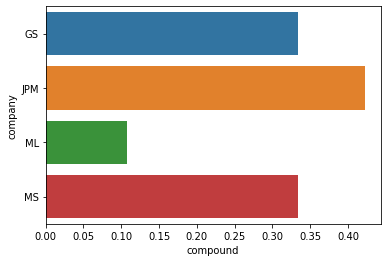

In [29]:
df_all_wm_com = pd.DataFrame(df_all_wm_com)
df_all_wm_com = df_all_wm_com.reset_index()
sns.barplot(y='company',x='compound',data=df_all_wm_com)

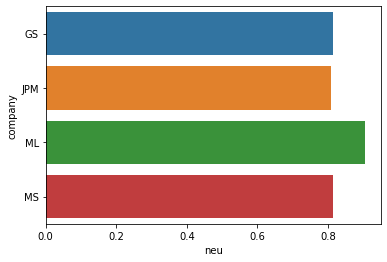

In [30]:
df_all_wm_neu = pd.DataFrame(df_all_wm_neu)
df_all_wm_neu = df_all_wm_neu.reset_index()
sns.barplot(y='company',x='neu',data=df_all_wm_neu)

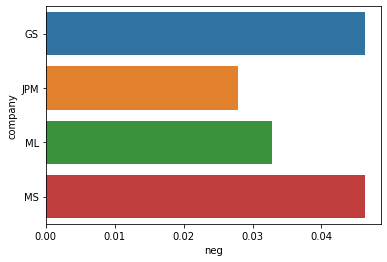

In [31]:
df_all_wm_neg = pd.DataFrame(df_all_wm_neg)
df_all_wm_neg = df_all_wm_neg.reset_index()
sns.barplot(y='company',x='neg',data=df_all_wm_neg)

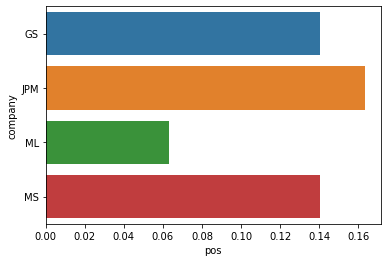

In [32]:
df_all_wm_pos = pd.DataFrame(df_all_wm_pos)
df_all_wm_pos = df_all_wm_pos.reset_index()
sns.barplot(y='company',x='pos',data=df_all_wm_pos)